**Notes to YT-Video: https://www.youtube.com/watch?v=c0k-YLQGKjY**

In [1]:
# Nice imports
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Get the user's home directory
user_home = os.path.expanduser("~")

# Specify the relative path to the target folder from the home directory
relative_path = 'HeroysundBridge-ML'

# Construct the full path to the target folder
target_folder = os.path.join(user_home, relative_path)

# Specify the name of the file you're looking for
file_name = 'combined.parquet'

# Construct the full path to the file
file_path = os.path.join(target_folder, file_name)

# Check if the file exists
if os.path.exists(file_path):
    print(f"Found '{file_name}' at: {file_path}")
else:
    print(f"File '{file_name}' not found in '{target_folder}'.")


Found 'combined.parquet' at: C:\Users\erlih\HeroysundBridge-ML\combined.parquet


In [3]:
df = pd.read_parquet(file_path)
df

,Hours_since_2019.12.31,Date,Point_1_N_mean,Point_2_N_mean,Point_3_N_mean,Point_4_S_mean,Point_5_S_mean,Point_6_S_mean,Omega_N_mean,Omega_S_mean,PT100_Temperature_mean,Gjennomsnittlig globalstråling (1 t),Solskinnstid (1 t),Middel av middelvind (1 t),Nedbør (1 t),Relativ luftfuktighet
0,5916,2020090212,18.324186,16.439996,12.273690,43.943916,41.496791,32.350760,-0.000391,-0.002391,16.261441,954.0,52.0,0.9,0.1,49.0
1,5940,2020090312,24.667922,24.155004,18.399311,58.603003,57.104418,46.496854,-0.000950,0.001639,16.858222,966.0,52.0,3.5,0.0,45.0
2,5962,2020090410,-15.535099,-21.302234,-17.400303,43.134141,39.866109,29.849380,0.004475,0.015130,14.256647,131.6,0.0,2.6,0.5,87.0
3,5966,2020090414,-10.819921,-15.643464,-12.470669,51.753103,50.788288,37.997157,0.001993,0.014450,14.687477,314.0,0.0,4.0,0.2,86.0
4,5970,2020090418,-15.399971,-18.856000,-14.976123,52.673533,51.309598,36.255848,0.005713,0.017729,13.874647,236.0,21.0,1.3,0.0,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26807,35082,2023123118,-20.227229,-104.882947,-99.809995,-277.179242,-317.856174,-257.119294,0.000000,-0.040876,-4.738139,-3.0,0.0,1.1,0.0,60.0
26808,35083,2023123119,-19.488729,-105.022363,-99.542072,-276.450669,-317.423938,-256.383557,0.000000,-0.040332,-4.625233,-3.0,0.0,1.3,0.0,59.0
26809,35084,2023123120,-21.503484,-107.888565,-100.934269,-278.409798,-319.099933,-258.295017,0.000000,-0.044919,-4.645648,-2.9,0.0,1.3,0.0,57.0
26810,35085,2023123121,-22.667015,-109.260424,-102.036887,-279.507222,-320.289949,-259.567834,0.000000,-0.048216,-4.756255,-2.9,0.0,1.3,0.0,56.0


**Making index (First column) set up in the correct way**

In [4]:
df.index = pd.to_datetime(df['Date'], format='%Y%m%d%H')
df

,Hours_since_2019.12.31,Date,Point_1_N_mean,Point_2_N_mean,Point_3_N_mean,Point_4_S_mean,Point_5_S_mean,Point_6_S_mean,Omega_N_mean,Omega_S_mean,PT100_Temperature_mean,Gjennomsnittlig globalstråling (1 t),Solskinnstid (1 t),Middel av middelvind (1 t),Nedbør (1 t),Relativ luftfuktighet
Date,,,,,,,,,,,,,,,,
2020-09-02 12:00:00,5916,2020090212,18.324186,16.439996,12.273690,43.943916,41.496791,32.350760,-0.000391,-0.002391,16.261441,954.0,52.0,0.9,0.1,49.0
2020-09-03 12:00:00,5940,2020090312,24.667922,24.155004,18.399311,58.603003,57.104418,46.496854,-0.000950,0.001639,16.858222,966.0,52.0,3.5,0.0,45.0
2020-09-04 10:00:00,5962,2020090410,-15.535099,-21.302234,-17.400303,43.134141,39.866109,29.849380,0.004475,0.015130,14.256647,131.6,0.0,2.6,0.5,87.0
2020-09-04 14:00:00,5966,2020090414,-10.819921,-15.643464,-12.470669,51.753103,50.788288,37.997157,0.001993,0.014450,14.687477,314.0,0.0,4.0,0.2,86.0
2020-09-04 18:00:00,5970,2020090418,-15.399971,-18.856000,-14.976123,52.673533,51.309598,36.255848,0.005713,0.017729,13.874647,236.0,21.0,1.3,0.0,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 18:00:00,35082,2023123118,-20.227229,-104.882947,-99.809995,-277.179242,-317.856174,-257.119294,0.000000,-0.040876,-4.738139,-3.0,0.0,1.1,0.0,60.0
2023-12-31 19:00:00,35083,2023123119,-19.488729,-105.022363,-99.542072,-276.450669,-317.423938,-256.383557,0.000000,-0.040332,-4.625233,-3.0,0.0,1.3,0.0,59.0
2023-12-31 20:00:00,35084,2023123120,-21.503484,-107.888565,-100.934269,-278.409798,-319.099933,-258.295017,0.000000,-0.044919,-4.645648,-2.9,0.0,1.3,0.0,57.0


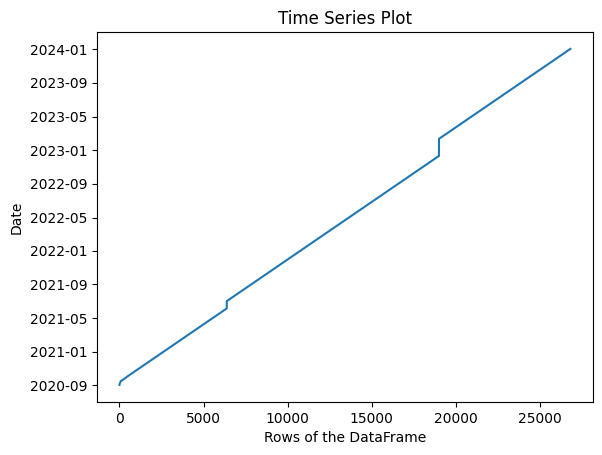

In [5]:
# Plot the time series
plt.plot(df.index)

# Add labels and title
plt.xlabel('Rows of the DataFrame')
plt.ylabel('Date')
plt.title('Time Series Plot')

# Show the plot
plt.show()

<Axes: xlabel='Date'>

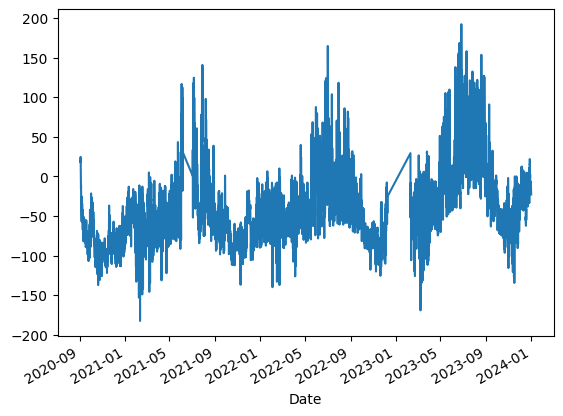

In [6]:
temp = df['Point_1_N_mean']
temp.plot()

In [7]:
 def df_to_X_y(df, window_size = 5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [8]:
WINDOW_SIZE = 5
X, y = df_to_X_y(temp, window_size = WINDOW_SIZE)
X.shape, y.shape

((26807, 5, 1), (26807,))

In [9]:
X_train, y_train = X[:20000], y[:20000]
X_valid, y_valid = X[20000:25000], y[20000:25000]
X_test, y_test = X[25000:], y[25000:]
X_train.shape, X_valid.shape, X_test.shape

((20000, 5, 1), (5000, 5, 1), (1807, 5, 1))

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((WINDOW_SIZE, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='linear'))
model1.summary()

# Assuming you want to use mean squared error as a metric
model1.compile(optimizer=Adam(), loss=mean_squared_error, metrics=['mse'])



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
cp = ModelCheckpoint(os.path.join(target_folder, 'model1/'), save_best_only=True)
model1.compile(optimizer=Adam(learning_rate=0.0001), loss=mean_squared_error, metrics=['mse'])

In [12]:
model1.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=4, callbacks=[cp])

Epoch 1/4


612/625 [============================>.] - ETA: 0s - loss: 3302.6621 - mse: 3302.6621INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model1\assets


INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model1\assets


625/625 [==============================] - 5s 6ms/step - loss: 3287.7419 - mse: 3287.7419 - val_loss: 1780.2303 - val_mse: 1780.2303
Epoch 2/4
603/625 [===========================>..] - ETA: 0s - loss: 2055.8042 - mse: 2055.8042INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model1\assets


INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model1\assets


625/625 [==============================] - 3s 5ms/step - loss: 2040.7584 - mse: 2040.7584 - val_loss: 1443.9481 - val_mse: 1443.9481
Epoch 3/4
621/625 [============================>.] - ETA: 0s - loss: 1319.2091 - mse: 1319.2091INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model1\assets


INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model1\assets


625/625 [==============================] - 3s 5ms/step - loss: 1317.3134 - mse: 1317.3134 - val_loss: 1194.4797 - val_mse: 1194.4797
Epoch 4/4
605/625 [============================>.] - ETA: 0s - loss: 816.1631 - mse: 816.1631INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model1\assets


INFO:tensorflow:Assets written to: C:\Users\erlih\HeroysundBridge-ML\model1\assets


625/625 [==============================] - 4s 6ms/step - loss: 811.1232 - mse: 811.1232 - val_loss: 991.6813 - val_mse: 991.6813


In [13]:
from tensorflow.keras.models import load_model

# Specify the full path to the model file
model_file_path = os.path.join(target_folder, 'model1/')

# Load the model from the specified file path
model1 = load_model(model_file_path)


In [14]:
train_predicitons = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions': train_predicitons,'Actuals': y_train})
train_results

625/625 [==============================] - 1s 1ms/step


,Train Predictions,Actuals
0,-18.414665,-27.594261
1,-37.135338,-35.693842
2,-39.709206,-41.641105
3,-44.292923,-40.452516
4,-41.092487,-41.855607
...,...,...
19995,0.621044,-5.304325
19996,-11.690798,-21.041623
19997,-35.532116,-38.226744
19998,-44.746605,-74.107251


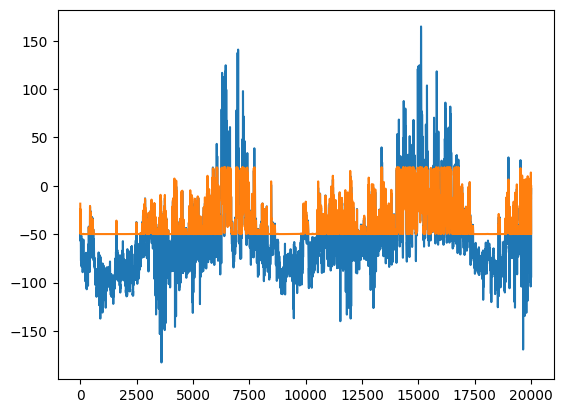

In [15]:
plt.plot(train_results['Actuals'], label='Actuals')
plt.plot(train_results['Train Predictions'], label='Predictions')

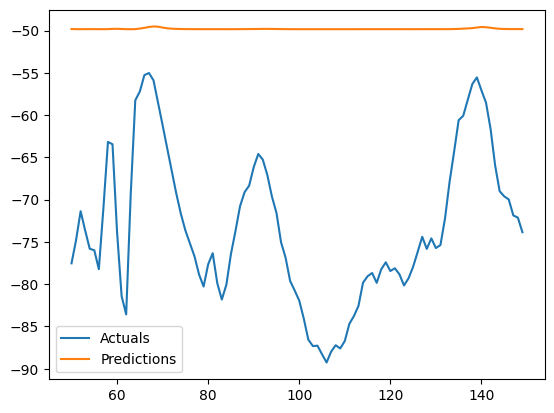

In [16]:
plt.plot(train_results['Actuals'][50:150], label='Actuals')
plt.plot(train_results['Train Predictions'][50:150], label='Predictions')
plt.legend()

**But we don't really care about how it did on the training, it has seen that data before**

In [17]:
val_predictions = model1.predict(X_valid).flatten()
val_results = pd.DataFrame(data={'Validation Predictions': val_predictions,'Actuals': y_valid}) 
val_results

157/157 [==============================] - 0s 1ms/step


,Validation Predictions,Actuals
0,-49.755123,-96.550086
1,-49.843197,-94.092458
2,-49.848400,-92.644098
3,-49.845074,-81.136179
4,-49.842121,-86.065332
...,...,...
4995,-49.822437,-63.889108
4996,-49.808537,-64.981470
4997,-49.806988,-67.381354
4998,-49.816357,-67.859735


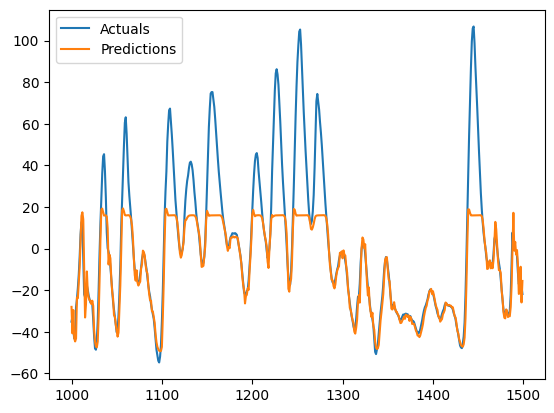

In [18]:
plt.plot(val_results['Actuals'][1000:1500], label='Actuals')
plt.plot(val_results['Validation Predictions'][1000:1500], label='Predictions')
plt.legend()    

In [19]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [1]:
print("Num CPUs Available: ", len(tf.config.list_physical_devices('CPU')))


NameError: name 'tf' is not defined